In [29]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import observations
import state
import mcmc
import driver
import numpy as np
import hashlib
import corner
from datetime import datetime

In [30]:
initial = [{'a': 0.2275, 'h': 0.00,'k': 0.00, 'm': 0.001965}]
label, Niter, Nwalkers, Scale = 'simple_mh_1', 32*50, 2, {'a': 0.0003, 'h': 0.01, 'k': 0.01, 'm': 0.00003}

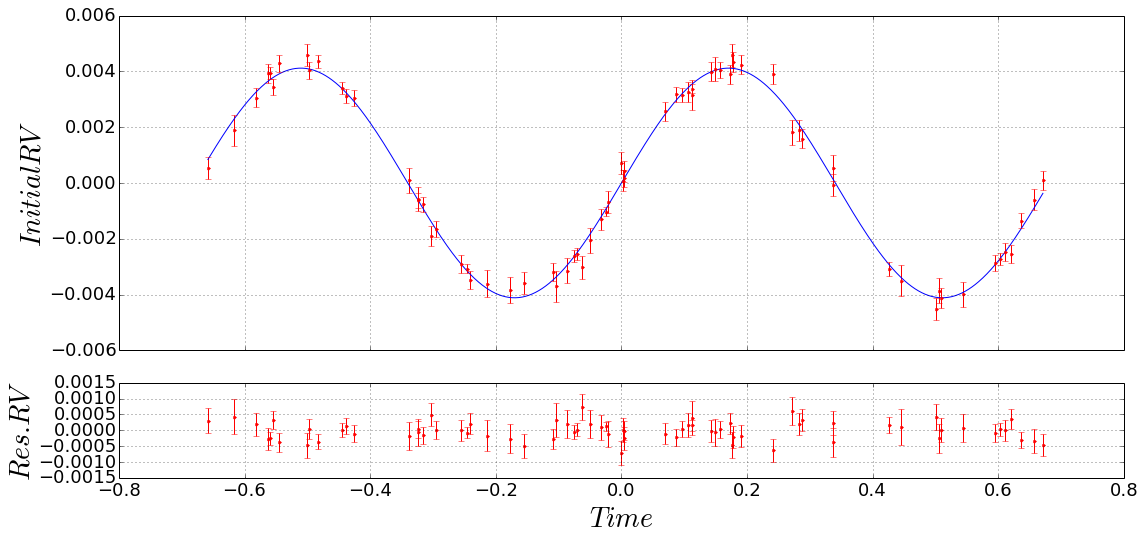

In [31]:
initial_state = state.State(planets = initial, ignore_vars='m')
obs = driver.createObs(initial_state, 70, 3.5e-4, 9e-5, 1.37)
driver.inLinePlotObs(initial_state, obs, [18,6])

In [80]:
reload(observations)
reload(state)
reload(mcmc)
reload(driver)

<module 'driver' from 'driver.py'>

# Start with MH|

In [61]:
mhbundle1, mhH1 = driver.createMH('simple_mh_1',Niter, initial_state, obs, Scale, 2e-4)

Progress: 0.0625%, 2 tries have been made, time: 2017-02-27 07:04:13.807378
Progress: 9.4375%, 152 tries have been made, time: 2017-02-27 07:04:14.184264
Progress: 18.812%, 302 tries have been made, time: 2017-02-27 07:04:14.558167
Progress: 28.188%, 452 tries have been made, time: 2017-02-27 07:04:14.948501
Progress: 37.562%, 602 tries have been made, time: 2017-02-27 07:04:15.324946
Progress: 46.938%, 752 tries have been made, time: 2017-02-27 07:04:15.691902
Progress: 56.312%, 902 tries have been made, time: 2017-02-27 07:04:16.062215
Progress: 65.688%, 1052 tries have been made, time: 2017-02-27 07:04:16.441247
Progress: 75.062%, 1202 tries have been made, time: 2017-02-27 07:04:16.808670
Progress: 84.438%, 1352 tries have been made, time: 2017-02-27 07:04:17.175579
Progress: 93.812%, 1502 tries have been made, time: 2017-02-27 07:04:17.543525
Acceptance rate: 100.000%
The id of the simulation is: ebd38df4fe1d62e4745bef06209ab5dd
The end time of the simulation is 2017-02-27 07:04:1

In [73]:
driver.inLinePlotChains(mhbundle1, [5,5], 'test', True)

In [79]:
driver.inLinePlotResults(mhbundle1, 50, [5,5], name='test', save=True)

Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$']
[  2.27497982e-01  -6.21033937e-05  -1.07087974e-04]
s1
s2


In [72]:
driver.inLinePlotCorners(mhbundle1, 'test', True)

In [82]:
actimes = driver.inLinePlotAcTimes(mhbundle1, [5,5], name='test', save=True)

AC time 100.0
AC time 108.0
AC time 225.0


In [89]:
reload(observations)
reload(state)
reload(mcmc)
reload(driver)

<module 'driver' from 'driver.pyc'>

# Smala

In [90]:
smbundle1, smH1 = driver.createSMALA('simple_mh_1',Niter/10, initial_state, obs, 0.4, 0.14)

Progress: 0.625%, 2 tries have been made, time: 2017-02-27 07:41:56.407360
Progress: 25.625%, 43 tries have been made, time: 2017-02-27 07:41:57.652372
Progress: 50.625%, 86 tries have been made, time: 2017-02-27 07:41:58.964158
Progress: 75.625%, 130 tries have been made, time: 2017-02-27 07:42:00.271781
Acceptance rate: 93.57%
The id of the simulation is: ebd38df4fe1d62e4745bef06209ab5dd
The end time of the simulation is 2017-02-27 07:42:01.561224


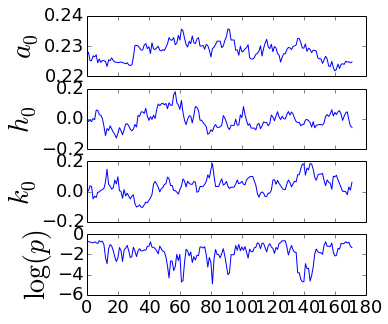

In [94]:
driver.inLinePlotChains(smbundle1, [5,5])

AC time 9.0
AC time 5.0
AC time 5.0


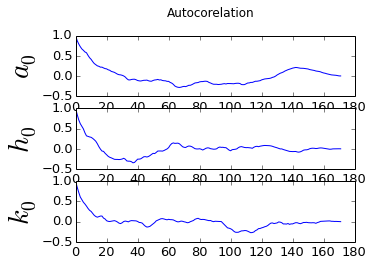

In [95]:
actimes = driver.inLinePlotAcTimes(smbundle1, [5,5])

Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$']
[ 0.2294743  -0.00607818  0.05658945]


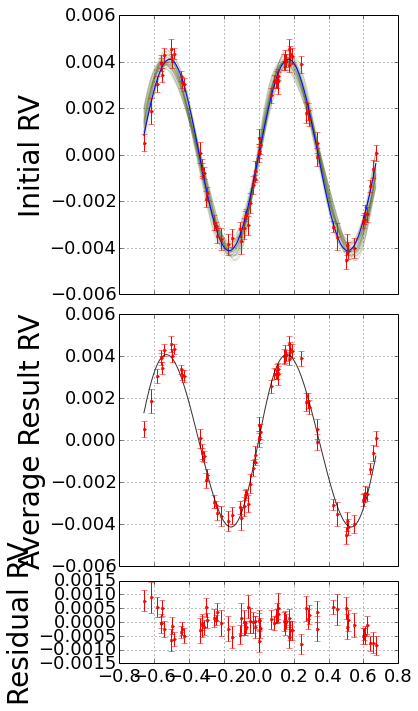

In [115]:
driver.inLinePlotResults(smbundle1, 50, [5,5])

In [110]:
reload(observations)
reload(state)
reload(mcmc)
reload(driver)

<module 'driver' from 'driver.py'>

# Emcee

In [102]:
embundle1, smH1 = driver.createEns('simple_emcee_1',Niter*10, initial_state, obs, 8, Scale)

Progress: 0.05%, time: 2017-02-27 07:47:37.937105
Progress: 10.05%, time: 2017-02-27 07:47:42.454559
Progress: 20.05%, time: 2017-02-27 07:47:47.095807
Progress: 30.05%, time: 2017-02-27 07:47:51.775458
Progress: 40.05%, time: 2017-02-27 07:47:56.550595
Progress: 50.05%, time: 2017-02-27 07:48:01.634270
Progress: 60.05%, time: 2017-02-27 07:48:06.273306
Progress: 70.05%, time: 2017-02-27 07:48:10.959444
Progress: 80.05%, time: 2017-02-27 07:48:15.526944
Progress: 90.05%, time: 2017-02-27 07:48:20.732728
Error(s): 0
Acceptance rate: 100.000%
The id of the simulation is: eeb342246bfe2ddab6fb9e92fc0347e4
The end time of the simulation is 2017-02-27 07:48:25.321508


In [113]:
driver.inLinePlotChains(embundle1, [5,5], 'test', True)

In [112]:
actimes = driver.inLinePlotAcTimes(embundle1, [5,5], 'ayaaa', True)

AC time 17.25
AC time 16.25
AC time 16.5


Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$']
[ 0.22703307  0.00976315 -0.00065624]


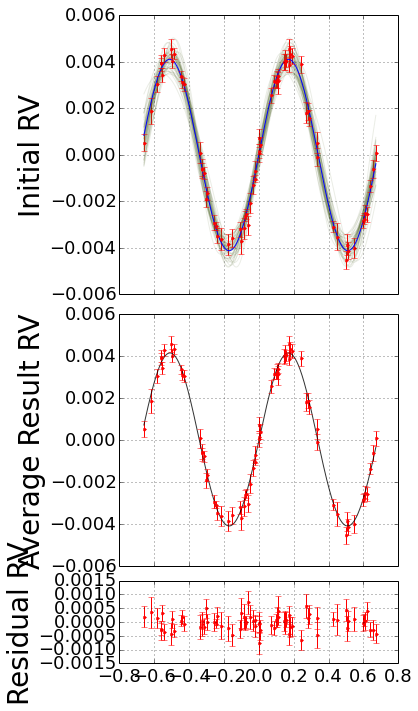

In [117]:
driver.inLinePlotResults(embundle1, 50, [5,5])